<a href="https://colab.research.google.com/github/micah-shull/Statistics/blob/main/Statistics_018_hypothesis_testing_penguins_flipper_length_by_species.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Flipper Length Analysis by Penguin Species: Summary**

---

#### **Objective**
To determine whether the mean flipper lengths differ significantly between the three penguin species: **Adelie**, **Chinstrap**, and **Gentoo**.

---

#### **Key Steps and Results**

1. **Exploratory Data Analysis**:
   - Visualized flipper length distributions by species using boxplots.
   - Observed clear differences in median flipper lengths across species.

2. **Variance Testing**:
   - **Test**: Levene’s Test for Equality of Variances.
   - **Result**: \(p = 0.6426\) (\(p > 0.05\)).
   - **Conclusion**: Variances between groups were not significantly different, allowing us to use **One-Way ANOVA**.

3. **Mean Comparison**:
   - **Test**: One-Way ANOVA.
   - **Result**: \(F = 567.41, p = 0.0000\) (\(p < 0.05\)).
   - **Conclusion**: At least one species has a significantly different mean flipper length.

4. **Post-Hoc Analysis**:
   - **Test**: Tukey’s Honest Significant Difference (HSD).
   - **Results**:
     - **Adelie vs. Chinstrap**: Significant difference (\(+5.72\) mm, \(p < 0.05\)).
     - **Adelie vs. Gentoo**: Significant difference (\(+27.13\) mm, \(p < 0.05\)).
     - **Chinstrap vs. Gentoo**: Significant difference (\(+21.41\) mm, \(p < 0.05\)).
   - All pairwise comparisons revealed statistically significant differences.

5. **Visualizations**:
   - **KDE Overlay Plot**: Showed clear separation between Gentoo and the other species, while Adelie and Chinstrap distributions showed some overlap.
   - **Barplot**: Highlighted the magnitude and direction of pairwise mean differences from Tukey’s HSD test.

---

#### **Conclusions**
1. **Gentoo penguins** have significantly longer flippers than both **Adelie** and **Chinstrap penguins**.
2. **Chinstrap penguins** have slightly longer flippers than **Adelie penguins**.
3. Variances between groups were not significant, validating the use of One-Way ANOVA and Tukey’s HSD test.

---

#### **Key Takeaways**
- This analysis confirms that species differences have a strong influence on flipper length.
- The combination of statistical tests and visualizations provides a robust understanding of the relationships between groups.




### **Step 1: Load and Explore the Dataset**

In [1]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Penguins dataset
penguins = sns.load_dataset("penguins").dropna()

# Convert object columns to categorical
categorical_columns = ['species', 'island', 'sex']
penguins[categorical_columns] = penguins[categorical_columns].astype('category')

# Verify the changes
penguins.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   species            333 non-null    category
 1   island             333 non-null    category
 2   bill_length_mm     333 non-null    float64 
 3   bill_depth_mm      333 non-null    float64 
 4   flipper_length_mm  333 non-null    float64 
 5   body_mass_g        333 non-null    float64 
 6   sex                333 non-null    category
dtypes: category(3), float64(4)
memory usage: 14.4 KB


#### Categorical Distribution Visualization

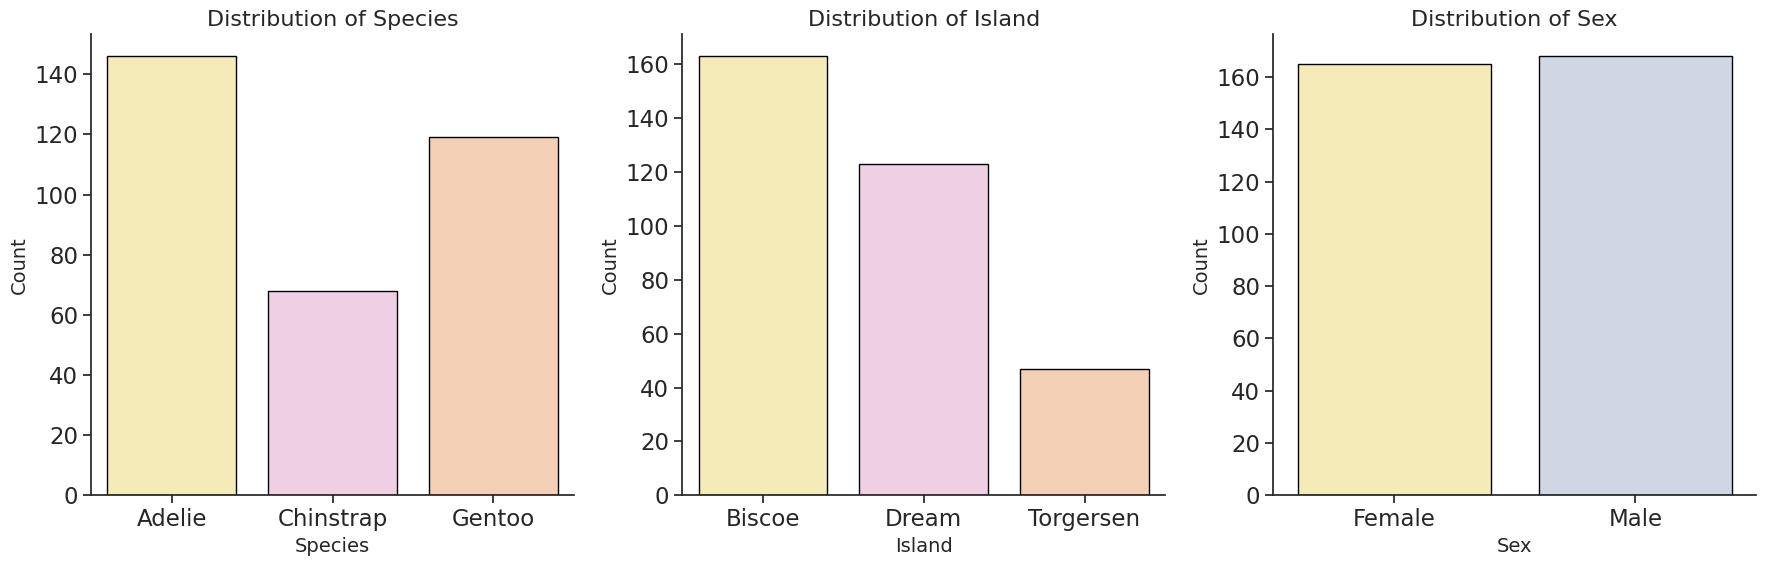

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set Seaborn theme, style, and palette
theme_style = "ticks"
palette_name = "Pastel2_r"
context_scale = "notebook"

sns.set_theme(style=theme_style, palette=palette_name)
sns.set_context(context_scale, font_scale=1.5, rc={"lines.linewidth": 2.5})

# Define categorical columns
categorical_columns = ['species', 'island', 'sex']

# Create a 1x3 grid of barplots
plt.figure(figsize=(18, 6))

for i, column in enumerate(categorical_columns, 1):
    plt.subplot(1, 3, i)
    sns.countplot(data=penguins, x=column, hue=column, palette=palette_name, edgecolor="black")
    plt.title(f"Distribution of {column.capitalize()}", fontsize=16)
    plt.xlabel(column.capitalize(), fontsize=14)
    plt.ylabel("Count", fontsize=14)
    sns.despine()

plt.tight_layout()
plt.show()



#### Numeric Distribution Visualization

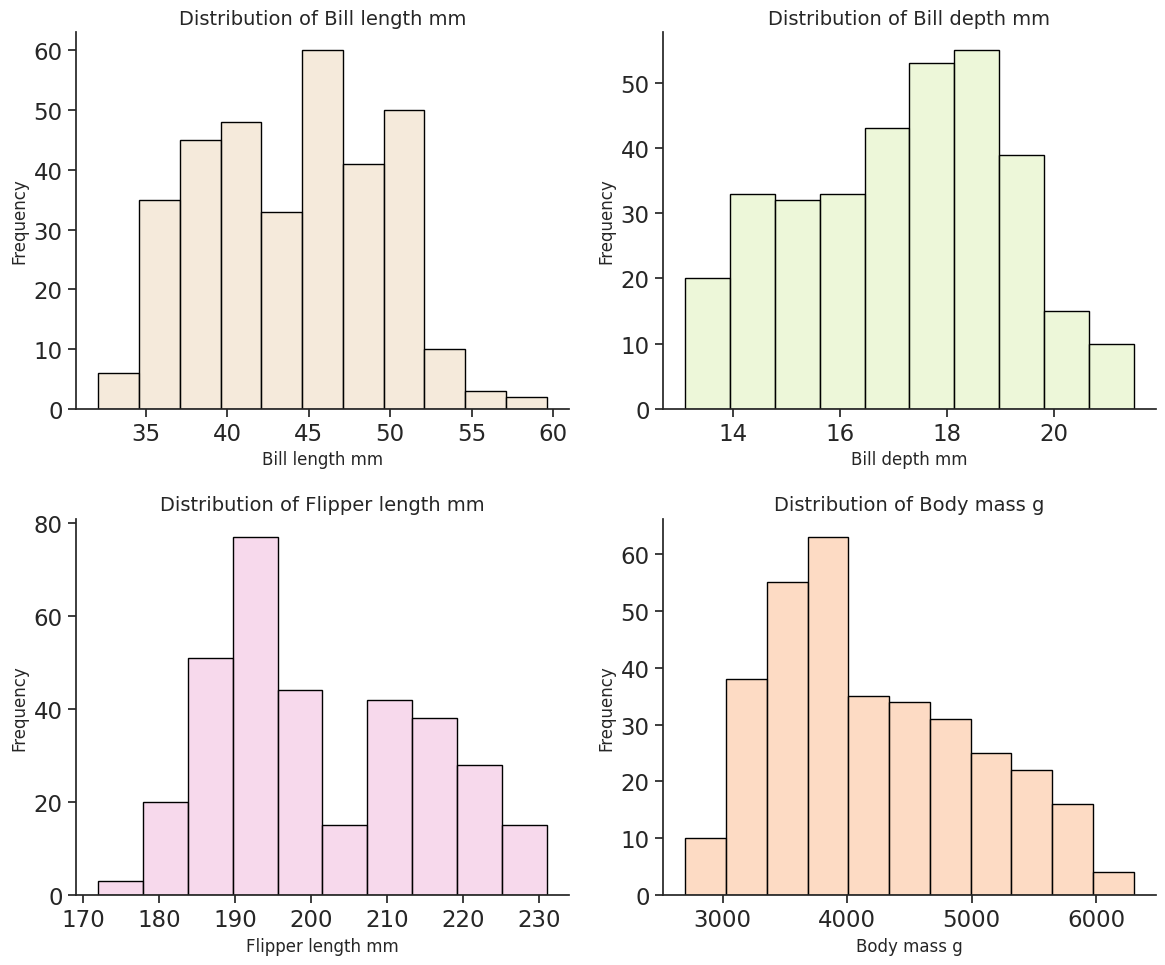

In [ ]:
# Numeric columns in the dataset
numeric_columns = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

# Plot overall distributions for each numeric feature
plt.figure(figsize=(12, 10))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(
        data=penguins,
        x=column,
        kde=False,  # Add KDE to show the density
        color=sns.color_palette(palette_name, n_colors=4)[i - 1],
        edgecolor="black",
        alpha=0.7
    )
    plt.title(f"Distribution of {column.replace('_', ' ').capitalize()}", fontsize=14)
    plt.xlabel(column.replace('_', ' ').capitalize(), fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    sns.despine()

plt.tight_layout()
plt.show()


### **Step 2: Identify Possible Research Questions**
Based on the dataset's structure, we’ll explore comparisons such as:
1. **Flipper Length by Species**:
   - Do the mean flipper lengths differ significantly between the three species?
2. **Body Mass by Island**:
   - Do the mean body masses differ significantly across islands?
3. **Bill Length by Sex**:
   - Does the mean bill length differ significantly between male and female penguins?



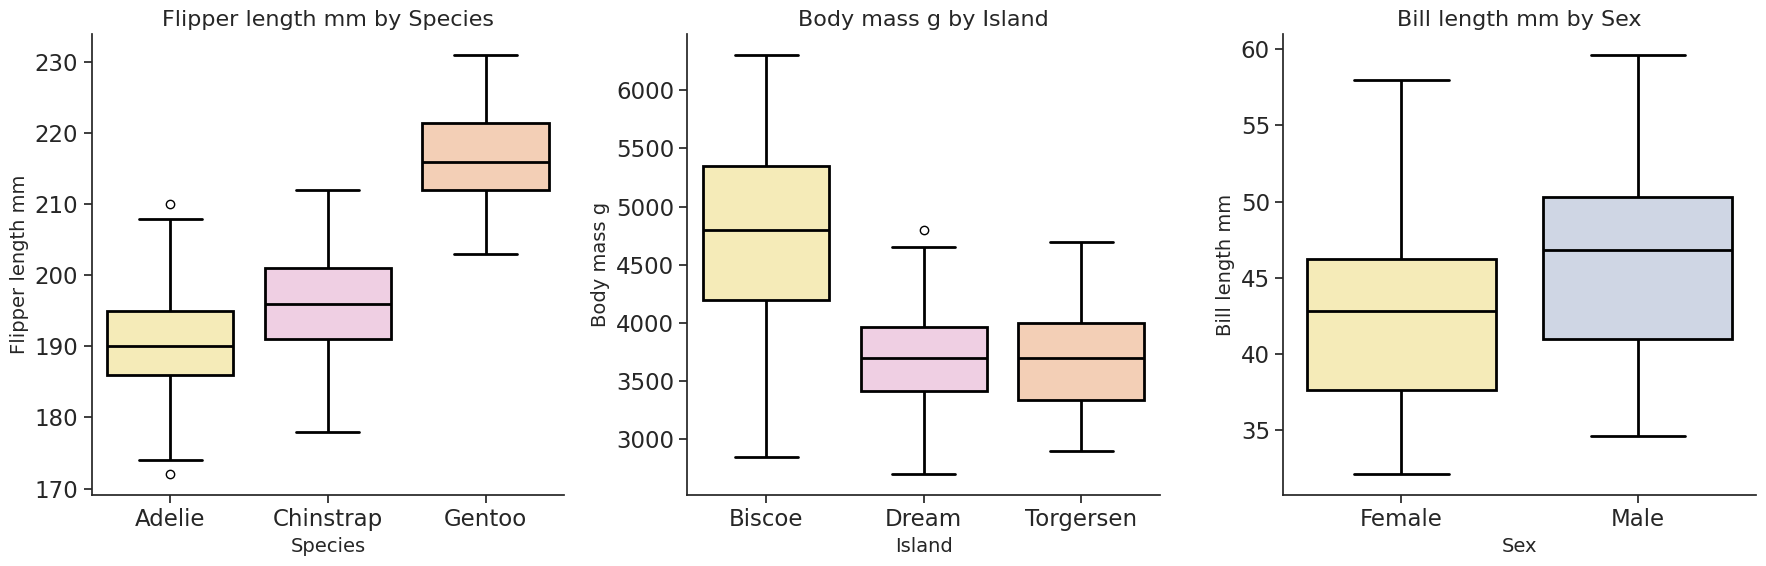

In [ ]:
# Numeric-Categorical pairs for visualization
visualizations = [
    ('flipper_length_mm', 'species'),
    ('body_mass_g', 'island'),
    ('bill_length_mm', 'sex')
]

# Create a 1x3 grid of boxplots
plt.figure(figsize=(18, 6))

for i, (numeric, categorical) in enumerate(visualizations, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(
        data=penguins,
        x=categorical,
        y=numeric,
        hue=categorical,
        palette=palette_name,
        linecolor="k", linewidth=2,
        showfliers=True,  # Display outliers for additional insights
    )
    plt.title(f"{numeric.replace('_', ' ').capitalize()} by {categorical.capitalize()}", fontsize=16)
    plt.xlabel(categorical.capitalize(), fontsize=14)
    plt.ylabel(numeric.replace('_', ' ').capitalize(), fontsize=14)
    sns.despine()

plt.tight_layout()
plt.show()


### **Hypothesis: Flipper Length by Species**

#### **Question**
Do the mean flipper lengths differ significantly between the three species: **Adelie**, **Chinstrap**, and **Gentoo**?

#### **Hypotheses**
- **Null Hypothesis (\(H_0\))**: The mean flipper lengths of Adelie, Chinstrap, and Gentoo penguins are equal.
- **Alternative Hypothesis (\(H_1\))**: At least one species has a mean flipper length significantly different from the others.

---

### **Variance Analysis**

To determine whether to use standard One-Way ANOVA or Welch’s ANOVA, we’ll first test for equality of variances using **Levene’s test**.


---

### **Next Steps**
1. **If Variances Are Equal (\(p > 0.05\))**:
   - Use **One-Way ANOVA** to test for differences in mean flipper length.
2. **If Variances Differ (\(p \leq 0.05\))**:
   - Use **Welch’s ANOVA** for a more robust analysis.



In [2]:
from scipy.stats import levene
import seaborn as sns
import matplotlib.pyplot as plt

# Extract flipper length data for each species
adelie_flipper_length = penguins[penguins['species'] == 'Adelie']['flipper_length_mm']
chinstrap_flipper_length = penguins[penguins['species'] == 'Chinstrap']['flipper_length_mm']
gentoo_flipper_length = penguins[penguins['species'] == 'Gentoo']['flipper_length_mm']

# Perform Levene's Test
stat, p_value = levene(adelie_flipper_length, chinstrap_flipper_length, gentoo_flipper_length)

# Output results
print("Levene's Test for Equality of Variances:")
print(f"Test Statistic: {stat:.2f}")
print(f"P-Value: {p_value:.4f}")

# Interpretation
alpha = 0.05
if p_value <= alpha:
    print("Conclusion: Reject the null hypothesis. Variances differ significantly between groups.")
else:
    print("Conclusion: Fail to reject the null hypothesis. No significant difference in variances between groups.")

Levene's Test for Equality of Variances:
Test Statistic: 0.44
P-Value: 0.6426
Conclusion: Fail to reject the null hypothesis. No significant difference in variances between groups.


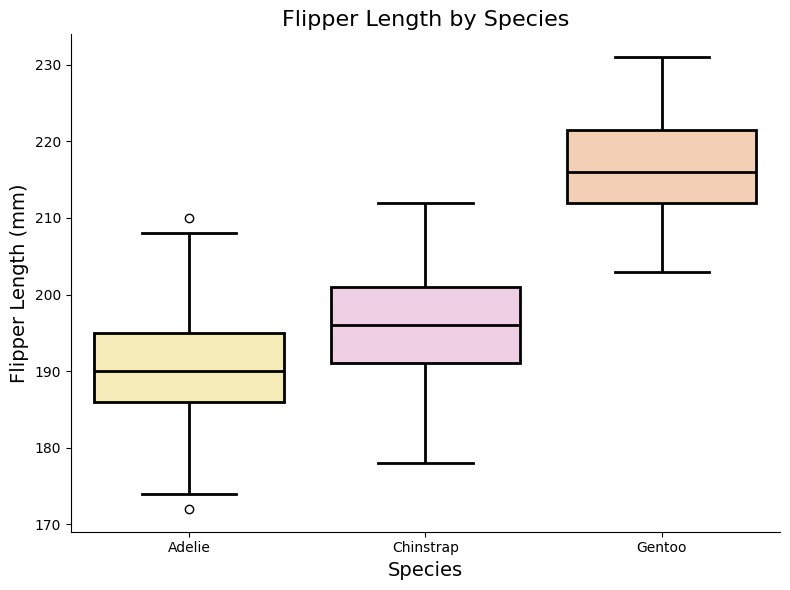

In [4]:
# Visualization: Boxplot for flipper length by species
plt.figure(figsize=(8, 6))
sns.boxplot(data=penguins, x='species', y='flipper_length_mm', hue='species', palette="Pastel2_r", linewidth=2, linecolor='k')
plt.title("Flipper Length by Species", fontsize=16)
plt.xlabel("Species", fontsize=14)
plt.ylabel("Flipper Length (mm)", fontsize=14)
sns.despine()
plt.tight_layout()
plt.show()

### **Interpretation of Levene's Test Results**

---

#### **Results**
- **Test Statistic**: \(0.44\)
- **P-Value**: \(0.6426\) (\(p > 0.05\)).

#### **Conclusion**
- Since \(p > 0.05\), we **fail to reject the null hypothesis**.
- This indicates that the variances in flipper length between the three species (**Adelie**, **Chinstrap**, **Gentoo**) are **not significantly different**.

---

### **Next Steps**
Since the variances are equal, we can proceed with a **One-Way ANOVA** to test whether the mean flipper lengths differ significantly between species.


### **Why Are We Using One-Way ANOVA?**

#### **Definition of One-Way ANOVA**
- **One-Way ANOVA** is used when you are testing for **differences in the means** of a single **dependent variable** (e.g., flipper length) across multiple **independent groups** (e.g., Adelie, Chinstrap, Gentoo species).
- The term "one-way" means there is **one independent variable** (or factor) being analyzed.

---

#### **Why One-Way for Flipper Length?**
In this case:
- **Dependent Variable**: Flipper length (\(y\)) (numeric data).
- **Independent Variable (Factor)**: Penguin species (\(x\)) (categorical data with three levels: Adelie, Chinstrap, Gentoo).

Since we are only considering **one factor (species)** to test its impact on flipper length, a **one-way ANOVA** is the appropriate choice.

---

### **When Would You Use Two-Way ANOVA?**

#### **Definition of Two-Way ANOVA**
- **Two-Way ANOVA** is used when you want to study the effects of **two independent variables** (factors) on a **single dependent variable**.
- It can also evaluate whether there is an **interaction** between the two factors.

---

#### **Example of Two-Way ANOVA**
Imagine we have:
1. **Dependent Variable**: Flipper length (\(y\)).
2. **Independent Variables (Factors)**:
   - **Species** (Adelie, Chinstrap, Gentoo).
   - **Sex** (Male, Female).

You could use a **two-way ANOVA** to:
1. Test whether **species** affects flipper length.
2. Test whether **sex** affects flipper length.
3. Test whether there is an **interaction effect** between species and sex on flipper length (e.g., whether the effect of species differs between males and females).

---

### **Choosing Between One-Way and Two-Way ANOVA**
1. **Use One-Way ANOVA**:
   - When there is **one independent variable** (factor) with two or more levels.
   - Example: Does **species** affect flipper length?

2. **Use Two-Way ANOVA**:
   - When there are **two independent variables**, and you want to test their effects individually and jointly.
   - Example: Does **species** and **sex** affect flipper length, and do they interact?

---

### **Summary for Penguins Example**
- Since we’re only testing whether **species** affects flipper length, a **one-way ANOVA** is the correct test here.
- If we wanted to include **sex** as another factor, we would use **two-way ANOVA**.


In [5]:
from scipy.stats import f_oneway

# Perform One-Way ANOVA
stat, p_value = f_oneway(adelie_flipper_length, chinstrap_flipper_length, gentoo_flipper_length)

# Output results
print("One-Way ANOVA Results:")
print(f"Test Statistic: {stat:.2f}")
print(f"P-Value: {p_value:.4f}")

# Interpretation
alpha = 0.05
if p_value <= alpha:
    print("Conclusion: Reject the null hypothesis. At least one group mean is significantly different.")
else:
    print("Conclusion: Fail to reject the null hypothesis. No significant difference in means between groups.")

One-Way ANOVA Results:
Test Statistic: 567.41
P-Value: 0.0000
Conclusion: Reject the null hypothesis. At least one group mean is significantly different.


### **Interpretation of One-Way ANOVA Results**

---

#### **Question**
Do the mean flipper lengths differ significantly between the three penguin species: **Adelie**, **Chinstrap**, and **Gentoo**?

---

#### **Key Results**
- **Test Statistic (F)**: \(567.41\)
  - This high F-value indicates that the variance between the group means is much larger than the variance within the groups.
- **P-Value**: \(0.0000\)
  - The p-value is far below the significance threshold (\(\alpha = 0.05\)).

---

#### **Conclusion**
- Since \(p < 0.05\), we **reject the null hypothesis**.
- This indicates that **at least one species has a mean flipper length significantly different from the others**.





### **Variance Between vs. Variance Within Groups**

#### 1. **Variance Between Groups**
- **What it measures**:
  - The **variance between group means** represents the differences in the average values (means) of the groups being compared.
  - It captures how much the group means deviate from the **overall mean** (grand mean) of the dataset.

- **Example for Penguins**:
  - If the mean flipper lengths for **Adelie**, **Chinstrap**, and **Gentoo** species differ significantly, the variance between the group means will be large.

#### 2. **Variance Within Groups**
- **What it measures**:
  - The **variance within groups** reflects the variability of individual data points **within each group** (e.g., individual penguins within Adelie, Chinstrap, or Gentoo).
  - It represents how much the data in each group spread around their group mean.

- **Example for Penguins**:
  - If all Adelie penguins have flipper lengths very close to their mean, the variance within the Adelie group will be small.

---

### **F-Statistic and the Ratio**

- **Large F-Statistic**:
  - A large F-value occurs when the group means are **very different** from one another (large between-group variance) relative to the variability within each group (small within-group variance).
  - This indicates that the differences between the groups are not due to random chance, but are likely significant.

- **Small F-Statistic**:
  - A small F-value occurs when the differences between group means are small compared to the variability within the groups.
  - This suggests that the group means are likely not significantly different.

---

### **In This Case**
- **High F-Statistic (\(567.41\))**:
  - This indicates that the differences in mean flipper lengths between **Adelie**, **Chinstrap**, and **Gentoo** species are much larger than the natural variability within each species group.
  - In other words, the groups are distinct with little overlap in their flipper length distributions.

---

### **Visual Intuition**
Imagine plotting the data:
1. **Large Between-Group Variance**:
   - The group means are far apart (e.g., Gentoo penguins have much longer flipper lengths than Adelie or Chinstrap penguins).
2. **Small Within-Group Variance**:
   - The data points within each species cluster tightly around their group mean.

This creates a clear distinction between groups, leading to a high F-statistic.

---

### **Key Takeaway**
The phrase **"variance between the group means is much larger than the variance within the groups"** simply means that:
1. The group means differ significantly from each other.
2. The variability within each group is small compared to the differences between the groups.
3. This is why we conclude that at least one group mean is significantly different.


### **Next Steps**
1. **Post-Hoc Testing**:
   - Conduct a post-hoc test (e.g., Tukey’s HSD or Games-Howell) to determine **which species pairs** have significantly different mean flipper lengths.

2. **Visualize Results**:
   - Use a barplot or boxplot to highlight differences between species.
   - Overlay the results from the post-hoc test to make the comparisons more intuitive.

---

#### **Code for Post-Hoc Testing**
Since variances are equal (\(p > 0.05\) in Levene's test), we’ll use **Tukey’s Honest Significant Difference (HSD)** test for post-hoc analysis:

In [7]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Perform Tukey’s HSD test
tukey = pairwise_tukeyhsd(
    endog=penguins['flipper_length_mm'],  # Dependent variable
    groups=penguins['species'],          # Independent variable (factor)
    alpha=0.05                           # Significance level
)

# Output results
print("Tukey's HSD Test Results:")
print(tukey)

# Visualization
# tukey.plot_simultaneous()
# plt.title("Tukey's HSD Test for Flipper Length by Species", fontsize=16)
# plt.show()

Tukey's HSD Test Results:
   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
  group1    group2  meandiff p-adj  lower   upper  reject
---------------------------------------------------------
   Adelie Chinstrap   5.7208   0.0  3.4144  8.0272   True
   Adelie    Gentoo  27.1326   0.0 25.1924 29.0727   True
Chinstrap    Gentoo  21.4118   0.0 19.0236 23.7999   True
---------------------------------------------------------


### **Interpretation of Tukey's HSD Test Results**

---

#### **Why Use Tukey’s HSD?**
- **Tukey’s Honest Significant Difference (HSD)** test is used for **post-hoc analysis** after ANOVA when:
  1. **ANOVA results are significant** (\(p < 0.05\)), indicating at least one group mean differs from the others.
  2. **Variances are equal** (\(p > 0.05\) in Levene's test).
- Tukey’s HSD identifies **which specific group pairs** have significantly different means while controlling the **Family-Wise Error Rate (FWER)** to avoid false positives due to multiple comparisons.

---

#### **Key Results**
- **Group Pairs Compared**:
  - Each row compares the mean flipper length of two species.
- **Mean Difference**:
  - The difference in the average flipper lengths between the two groups.
- **p-adj (Adjusted p-value)**:
  - Adjusted \(p\)-value accounts for multiple comparisons. If \(p < 0.05\), the difference is statistically significant.
- **Lower and Upper Bounds**:
  - Confidence interval for the mean difference. If it doesn’t include 0, the difference is significant.
- **Reject**:
  - Indicates whether to reject the null hypothesis for the pairwise comparison.

---

#### **Detailed Interpretation**
1. **Adelie vs. Chinstrap**:
   - **Mean Difference**: \(5.72\) mm.
   - **Adjusted p-Value**: \(0.0\) (\(p < 0.05\)).
   - **Confidence Interval**: [\(3.41, 8.03\)] (does not include 0).
   - **Conclusion**: The mean flipper length of Adelie penguins is significantly different from Chinstrap penguins.

2. **Adelie vs. Gentoo**:
   - **Mean Difference**: \(27.13\) mm.
   - **Adjusted p-Value**: \(0.0\) (\(p < 0.05\)).
   - **Confidence Interval**: [\(25.19, 29.07\)] (does not include 0).
   - **Conclusion**: The mean flipper length of Adelie penguins is significantly different from Gentoo penguins.

3. **Chinstrap vs. Gentoo**:
   - **Mean Difference**: \(21.41\) mm.
   - **Adjusted p-Value**: \(0.0\) (\(p < 0.05\)).
   - **Confidence Interval**: [\(19.02, 23.80\)] (does not include 0).
   - **Conclusion**: The mean flipper length of Chinstrap penguins is significantly different from Gentoo penguins.

---

#### **Key Takeaways**
- All pairwise comparisons show **statistically significant differences** (\(p < 0.05\)).
- **Gentoo penguins** have much longer flipper lengths than both **Adelie** and **Chinstrap penguins**.
- **Chinstrap penguins** also have slightly longer flipper lengths than **Adelie penguins**.

---

#### **Why Use Tukey’s HSD in This Case?**
1. **Equal Variances**:
   - Levene’s test confirmed no significant variance differences (\(p > 0.05\)), satisfying the assumptions for Tukey’s HSD.
2. **Balanced Design**:
   - Tukey’s HSD works best with relatively balanced group sizes, which is true for the penguin species in this dataset.
3. **Multiple Comparisons**:
   - Tukey’s HSD controls for the increased risk of Type I errors when making multiple pairwise comparisons.

---

#### **Next Steps**
1. **Visualize the Results**:
   - Create a barplot to illustrate the mean differences and highlight significant comparisons.
2. **Contextualize the Findings**:
   - Relate these differences to biological or environmental factors affecting the species.


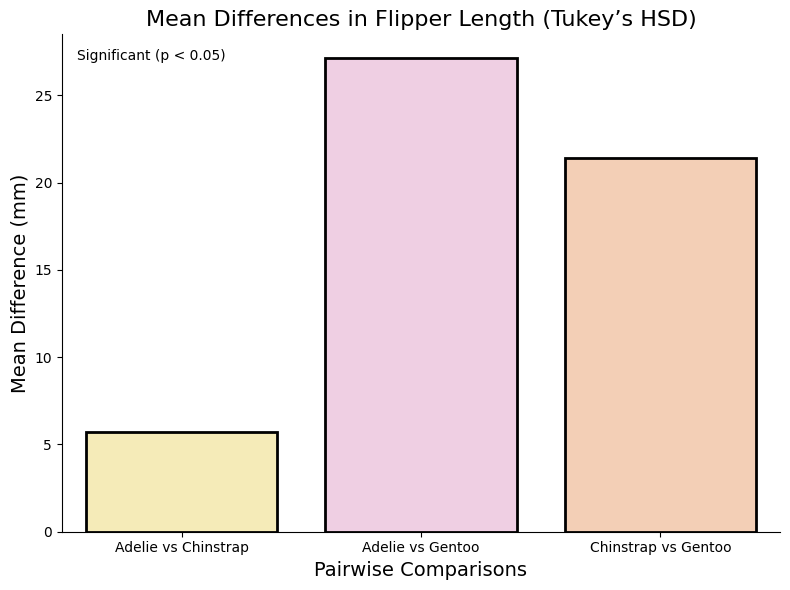

In [25]:
# Prepare data for barplot
tukey_data = {
    'Comparison': ['Adelie vs Chinstrap', 'Adelie vs Gentoo', 'Chinstrap vs Gentoo'],
    'Mean Difference': [5.72, 27.13, 21.41],
    'p-Value': [0.0, 0.0, 0.0],
    'Significant': ['Yes', 'Yes', 'Yes']
}

tukey_df = pd.DataFrame(tukey_data)
tukey_df['Comparison'] = tukey_df['Comparison'].astype('category')

# Barplot for mean differences
plt.figure(figsize=(8, 6))
sns.barplot(
    data=tukey_df,
    x='Comparison',
    y='Mean Difference',
    hue='Comparison',
    palette="Pastel2_r",
    edgecolor='k',
    linewidth=2
)

# Add a horizontal line at 0
# plt.axhline(0, color='black', linestyle="--", linewidth=1)

# Customize the plot
plt.title("Mean Differences in Flipper Length (Tukey’s HSD)", fontsize=16)
plt.xlabel("Pairwise Comparisons", fontsize=14)
plt.ylabel("Mean Difference (mm)", fontsize=14)
sns.despine()
plt.tight_layout()

# Suppress the warning by explicitly managing the legend
plt.legend(title="Significant (p < 0.05)", fontsize=12, loc="upper left", frameon=False)
plt.show()


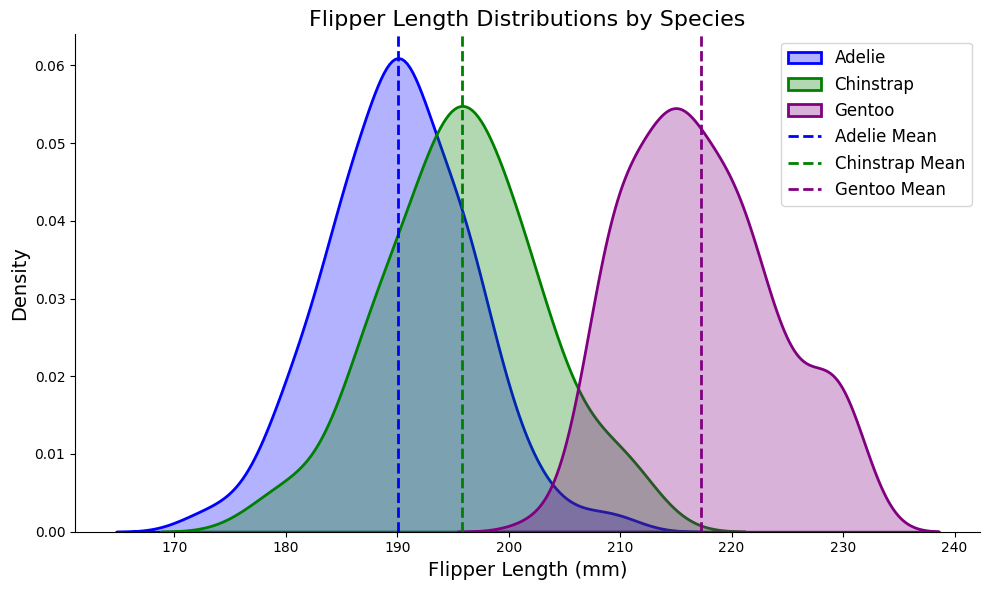

In [26]:
# KDE Overlay Plot for Flipper Length by Species
plt.figure(figsize=(10, 6))

# KDE plots for each species
sns.kdeplot(data=penguins[penguins['species'] == 'Adelie']['flipper_length_mm'],
            fill=True, alpha=0.3, linewidth=2, label="Adelie", color="blue")
sns.kdeplot(data=penguins[penguins['species'] == 'Chinstrap']['flipper_length_mm'],
            fill=True, alpha=0.3, linewidth=2, label="Chinstrap", color="green")
sns.kdeplot(data=penguins[penguins['species'] == 'Gentoo']['flipper_length_mm'],
            fill=True, alpha=0.3, linewidth=2, label="Gentoo", color="purple")

# Add vertical lines for group means
plt.axvline(penguins[penguins['species'] == 'Adelie']['flipper_length_mm'].mean(), color="blue", linestyle="--", linewidth=2, label="Adelie Mean")
plt.axvline(penguins[penguins['species'] == 'Chinstrap']['flipper_length_mm'].mean(), color="green", linestyle="--", linewidth=2, label="Chinstrap Mean")
plt.axvline(penguins[penguins['species'] == 'Gentoo']['flipper_length_mm'].mean(), color="purple", linestyle="--", linewidth=2, label="Gentoo Mean")

# Customize the plot
plt.title("Flipper Length Distributions by Species", fontsize=16)
plt.xlabel("Flipper Length (mm)", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.legend(fontsize=12, loc="upper right")
sns.despine()
plt.tight_layout()
plt.show()
